In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df=pd.read_csv('./data/MNIST_CSV/mnist_train.csv')
df2=pd.read_csv('./data/MNIST_CSV/mnist_test.csv')
# df.head(10)

In [3]:
data=np.array(df)
m,n=data.shape
data2=np.array(df2)
m1,n1=data2.shape


In [4]:
data=data.T
Y_train=data[0]
X_train=data[1:n]
X_train=X_train/255


data2=data2.T
Y_test=data2[0]
X_test=data2[1:n1]
X_test=X_test/255

1


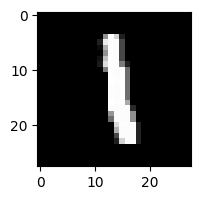

In [20]:
img=X_train[:,5].reshape(28,28)*255
print(Y_train[5])
plt.figure(figsize=(2,2))
plt.gray()
plt.imshow(img,interpolation='nearest')
plt.show()

In [35]:
len(Y_train)

59999

<img src='Screenshot 2025-02-07 at 5.54.39 PM.png'>

In [44]:
losses=[]

In [45]:
def init_params():
    W1=np.random.rand(10,784)-0.5
    b1=np.random.rand(10,1)-0.5
    W2=np.random.rand(10,10)-0.5
    b2=np.random.rand(10,1)-0.5
    return W1,b1,W2,b2

def ReLU(Z):
    return np.maximum(Z,0)

def softmax(Z):
    A=np.exp(Z) / sum(np.exp(Z))
    return A

def forward_prop(W1,b1,W2,b2,X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1,A1,Z2,A2

def ReLU_deriv(Z):
    return Z>0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1,A1,Z2,A2,W1,W2,X,Y):
    one_hot_Y=one_hot(Y)
    dZ2=A2-one_hot_Y
    losses.append(dZ2)
    dW2=1/m * dZ2.dot(A1.T)
    db2=1/m * np.sum(dZ2)

    dZ1=W2.T.dot(dZ2)*ReLU_deriv(Z1)
    dW1=1/m * dZ1.dot(X.T)
    db1=1/m * np.sum(dZ1)

    return dW1,db1,dW2,db2


def update_params(W1,b1,W2,b2,dW1,db1,dW2,db2,alpha):
    W1=W1-alpha*dW1
    b1=b1-alpha*db1
    W2=W2-alpha*dW2
    b2=b2-alpha*db2
    return W1,b1,W2,b2

In [46]:
def get_prediction(A2):
    return np.argmax(A2,0)

def get_accuracy(predictions,Y):
    print(predictions,Y)
    return np.sum(predictions==Y)/Y.size

def gradient_descent(X,Y,alpha,iterations):
    W1,b1,W2,b2=init_params()
    for i in range(iterations):
        Z1,A1,Z2,A2=forward_prop(W1,b1,W2,b2,X)
        dW1,db1,dW2,db2=backward_prop(Z1,A1,Z2,A2,W1,W2,X,Y)
        W1,b1,W2,b2=update_params(W1,b1,W2,b2,dW1,db1,dW2,db2,alpha)

        if i%10 == 0:
            print("Iterations: ",i)
            predictions=get_prediction(A2)
            print(get_accuracy(predictions,Y))
    return W1,b1,W2,b2

In [47]:
W1,b1,W2,b2=gradient_descent(X_train,Y_train,0.1,500)

Iterations:  0
[3 1 8 ... 9 1 3] [0 4 1 ... 5 6 8]
0.09638493974899581
Iterations:  10
[0 1 7 ... 0 6 7] [0 4 1 ... 5 6 8]
0.18605310088501475
Iterations:  20
[0 4 2 ... 0 6 7] [0 4 1 ... 5 6 8]
0.26248770812846883
Iterations:  30
[0 4 2 ... 0 6 4] [0 4 1 ... 5 6 8]
0.3377389623160386
Iterations:  40
[0 4 2 ... 0 6 4] [0 4 1 ... 5 6 8]
0.3991399856664278
Iterations:  50
[0 4 2 ... 0 6 4] [0 4 1 ... 5 6 8]
0.4480074667911132
Iterations:  60
[0 4 2 ... 0 6 4] [0 4 1 ... 5 6 8]
0.4877081284688078
Iterations:  70
[0 4 2 ... 0 6 4] [0 4 1 ... 5 6 8]
0.5235587259787663
Iterations:  80
[0 4 2 ... 0 6 4] [0 4 1 ... 5 6 8]
0.555642594043234
Iterations:  90
[0 4 2 ... 0 6 4] [0 4 1 ... 5 6 8]
0.5833597226620444
Iterations:  100
[0 4 2 ... 5 6 4] [0 4 1 ... 5 6 8]
0.6078101301688361
Iterations:  110
[0 4 2 ... 5 6 4] [0 4 1 ... 5 6 8]
0.6276437940632343
Iterations:  120
[0 4 2 ... 5 6 4] [0 4 1 ... 5 6 8]
0.6445274087901465
Iterations:  130
[0 4 1 ... 5 6 5] [0 4 1 ... 5 6 8]
0.6603110051834197
I

In [48]:
losses

[array([[-0.90756941,  0.02269492,  0.01366404, ...,  0.07931649,
          0.13883322,  0.01023142],
        [ 0.15498652,  0.40216429, -0.96269869, ...,  0.00633681,
          0.22546098,  0.08334647],
        [ 0.03481571,  0.00525605,  0.1789662 , ...,  0.04782299,
          0.03630184,  0.01318109],
        ...,
        [ 0.01835318,  0.00199369,  0.17234519, ...,  0.09753626,
          0.01000573,  0.09660739],
        [ 0.11070277,  0.01983674,  0.21421729, ...,  0.15030948,
          0.17159375, -0.95145803],
        [ 0.06223687,  0.13146131,  0.08294834, ...,  0.32293118,
          0.04522775,  0.09440935]], shape=(10, 59999)),
 array([[-0.85100747,  0.03326715,  0.02157613, ...,  0.11337543,
          0.16984229,  0.01726929],
        [ 0.20812717,  0.39235179, -0.94570008, ...,  0.00758866,
          0.23590541,  0.08677184],
        [ 0.04039879,  0.00738726,  0.17119651, ...,  0.05531048,
          0.03807935,  0.0172225 ],
        ...,
        [ 0.02583326,  0.00330324, 

In [55]:
def make_predictions(X,W1,b1,W2,b2):
    _,_,_,A2=forward_prop(W1,b1,W2,b2,X)
    prediction=get_prediction(A2)
    return prediction

def test_predictions(index,W1,b1,W2,b2):
    img=X_train[:,index,None]
    prediction=make_predictions(X_train[:,index,None],W1,b1,W2,b2)
    label=Y_train[index]
    print("Prediction: ",prediction)
    print("Label ",label)

    img=img.reshape(28,28)*255
    plt.figure(figsize=(2,2))
    plt.gray()
    plt.imshow(img,interpolation='nearest')
    plt.show()

In [53]:
test_result=make_predictions(X_test,W1,b1,W2,b2)
get_accuracy(test_result,Y_test)

[2 1 0 ... 4 5 6] [2 1 0 ... 4 5 6]


np.float64(0.8443844384438444)

Prediction:  [4]
Label  4


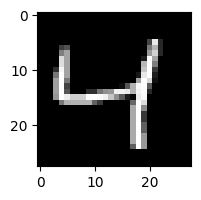

Prediction:  [5]
Label  5


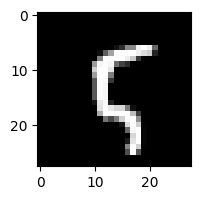

Prediction:  [9]
Label  4


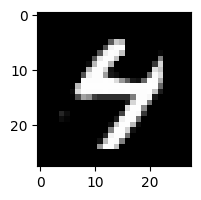

In [56]:
test_predictions(1,W1,b1,W2,b2)
test_predictions(99,W1,b1,W2,b2)
test_predictions(990,W1,b1,W2,b2)